# Harmonic Analysis of Memoryless Systems

In this notebook we take a look at the effect of a static nonlinearity on the frequency spectrum of an input signal by
the example of a quantizer. First, the necessary imports.

In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from src.utils.dft import dft
from src.utils.io import load_audio, save_audio
from src.utils.plotting import init_plot_style

init_plot_style()

C:\Users\sophi\.julia\conda\3\envs\nsp2021\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\sophi\.julia\conda\3\envs\nsp2021\lib\site-packages\torchaudio\backend\utils.py:89: UserWarning: No audio backend is available.
  warnings.warn('No audio backend is available.')


Let us also look at the input/output response of the quantizer.

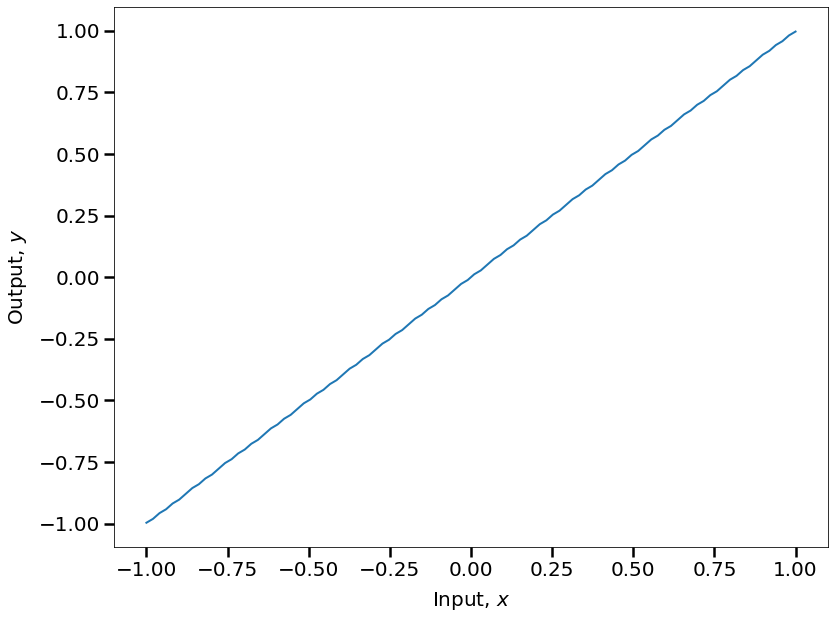

In [2]:
def quantizer(x, bitwidth=1, input_range=(-1.0, 1.0)):
    """A variable-bitwidth quantizer.

    Parameters
    ----------
    x : float or numpy.ndarray
        The input signal.
    bitwidth : int
        The bitwidth of the quantizer determining its resolution, i.e., the quantizer
        can represent 2^bitwidth output levels.
    input_range : tuple
        Tuple that determines the input range of the quantizer as (x_min, x_max).

    Returns
    ------
    float or numpy.ndarray
        The quantized input.
    """
    bin_size = (input_range[1] - input_range[0]) / 2**bitwidth
    bin_edges = np.arange(0, 2**bitwidth + 1) * bin_size + input_range[0]
    levels = np.arange(0, 2**bitwidth) * bin_size + bin_size/2 + input_range[0]

    bin_idc = np.digitize(x, bin_edges) - 1
    bin_idc[bin_idc >= len(levels)] = len(levels) -1
    y = levels[bin_idc]
    return y

# sample support and compute system output
support = np.linspace(-1, 1, 100)
response = quantizer(support, bitwidth=8)

# plot the input/output behavior
plt.figure()
plt.plot(support, response)
plt.xlabel('Input, $x$')
plt.ylabel('Output, $y$')
plt.tight_layout()

To examine the frequency domain effects of the quantizer we first generate a sinusoidal test signal.

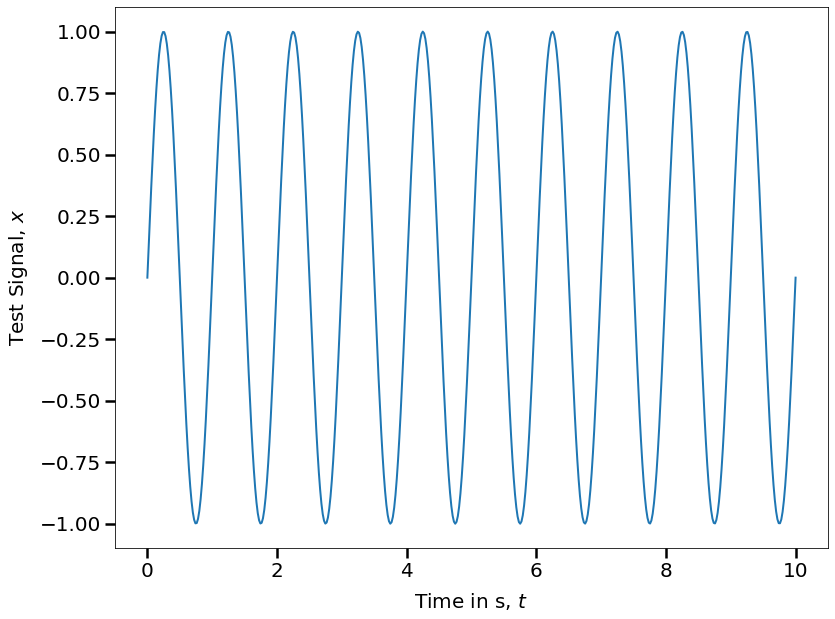

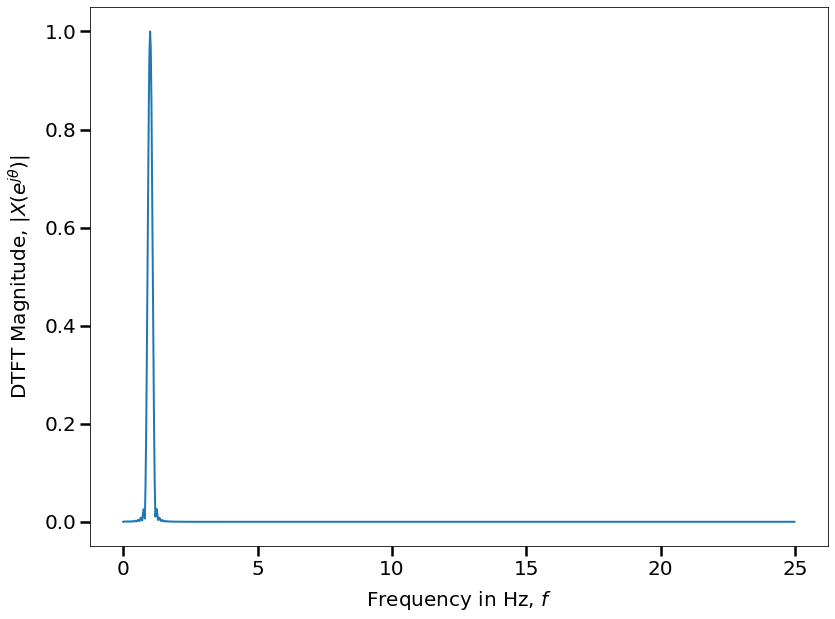

In [3]:
# test signal parameters
f0 = 1 # signal frequency in Hz
fs = 50 # sampling frequency in Hz
num_samples = 500 # number of samples to generate

# generate the test signal
sample_times = np.linspace(0, num_samples/fs, num_samples)
test_signal = np.sin(2*np.pi*f0 * sample_times)

# plot the test signal
plt.figure(figsize=(12,9))
plt.plot(sample_times, test_signal)
plt.xlabel(r'Time in s, $t$')
plt.ylabel(r'Test Signal, $x$')
plt.tight_layout()

# plot the test signal's magnitude response
X, f = dft(test_signal, fs=fs, n_dft=2048)
plt.figure(figsize=(12,9))
plt.plot(f,X)
plt.xlabel(r'Frequency in Hz, $f$')
plt.ylabel(r'DTFT Magnitude, $|X(e^{j\theta})|$')
plt.tight_layout()


Now, we'll send our test signal through the quantizer and look at the time domain output.

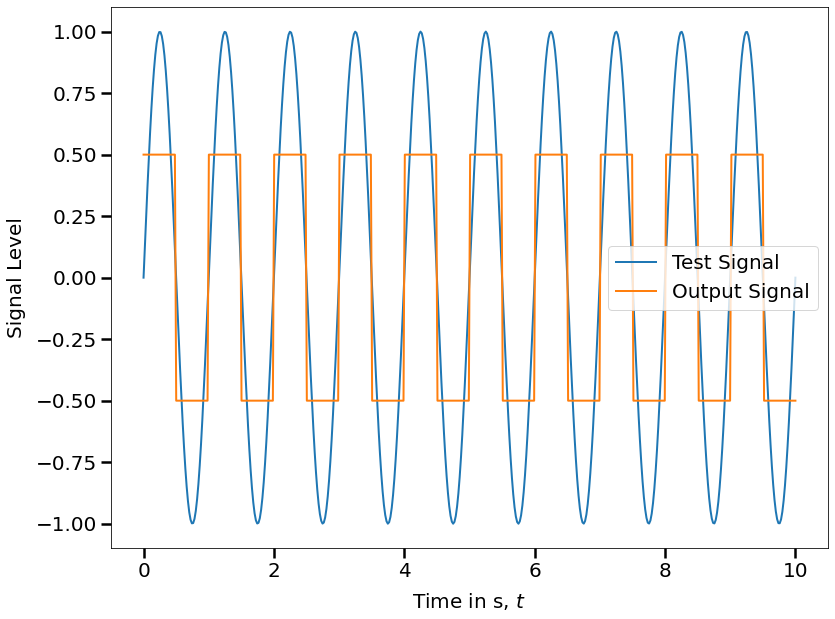

In [4]:
output_signal = quantizer(test_signal, bitwidth=1)

plt.figure(figsize=(12,9))
plt.plot(sample_times, test_signal, label='Test Signal')
plt.plot(sample_times, output_signal, label='Output Signal')
plt.xlabel('Time in s, $t$')
plt.ylabel('Signal Level')
plt.legend()
plt.tight_layout()

Finally, we can compare the spectra of our test and output signals.

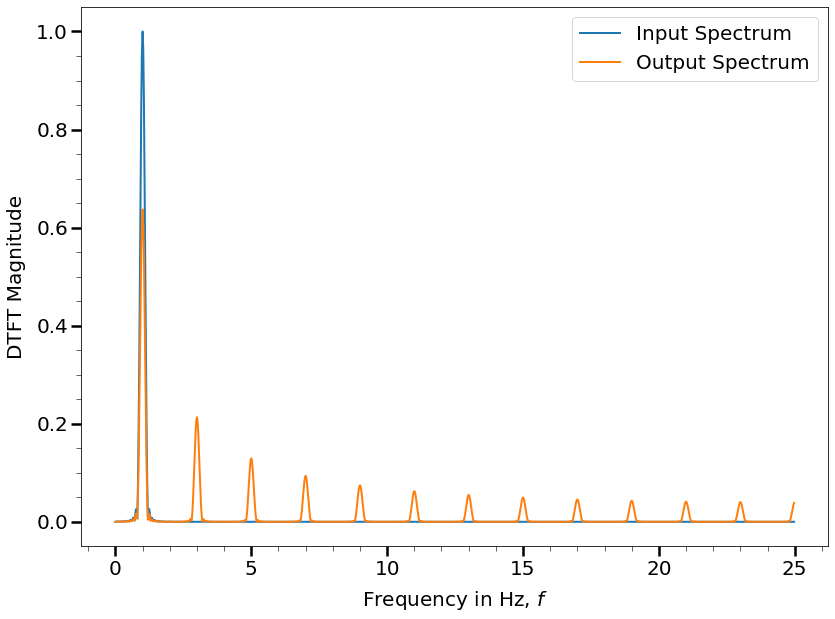

In [5]:
Y, f = dft(output_signal, fs=fs, n_dft=2048)

plt.figure(figsize=(12,9))
plt.plot(f, X, label='Input Spectrum')
plt.plot(f, Y, label='Output Spectrum')
plt.xlabel('Frequency in Hz, $f$')
plt.ylabel('DTFT Magnitude')
plt.minorticks_on()
plt.legend()
plt.tight_layout()

Bonus: if you want to really *experience* nonlinearity (here: the quantizer), you can simply run your favorite song
through the quantizer an have a listen.

In [6]:
data_dir = '../../data/sound/'
input_file = 'plucky-daisy.mp3'
output_file = 'plucky-daisy-quantized.mp3'
original_audio, samplerate = load_audio(data_dir + input_file)
distorted_audio = quantizer(original_audio, bitwidth=5)
save_audio(data_dir + output_file, distorted_audio, samplerate)



RuntimeError: No audio I/O backend is available.